<a href="https://colab.research.google.com/github/zzp-seeker/ee/blob/master/t1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP5318 Assignment 2
*Make sure you change the file name with your unikey*

# 1. Data set up


## 1.1 Load Data

Please upload both datasets (any file format is ok) to your google drive, and load the datasets through google drive file id in your code. If you want to use Jupyter, please submit all the dataset in an additional zip file.




In [ ]:
# 加载数据
!gdown --id '1m26TV-Rp3H3RamSQ_2DzR_GRFDUMD-RW' --output Datasets.zip
!unzip Datasets.zip
!ls
import shutil,os
macosx_path='/content/__MACOSX'
if os.path.exists(macosx_path):
    shutil.rmtree(macosx_path)

Downloading...
From: https://drive.google.com/uc?id=1m26TV-Rp3H3RamSQ_2DzR_GRFDUMD-RW
To: /content/Datasets.zip
20.5MB [00:00, 125MB/s] 
Archive:  Datasets.zip
replace Datasets/amazon_book.review? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
  inflating: __MACOSX/Datasets/._amazon_book.review  
  inflating: __MACOSX/Datasets/._CroppedYale  
  inflating: __MACOSX/Datasets/._.DS_Store  
  inflating: __MACOSX/Datasets/CroppedYale/._.DS_Store  
  inflating: __MACOSX/Datasets/CroppedYale/._yaleB02  
  inflating: __MACOSX/Datasets/CroppedYale/._yaleB05  
  inflating: __MACOSX/Datasets/CroppedYale/._yaleB04  
  inflating: __MACOSX/Datasets/CroppedYale/._yaleB03  
  inflating: __MACOSX/Datasets/CroppedYale/._yaleB10  
  inflating: __MACOSX/Datasets/CroppedYale/._yaleB08  
  inflating: __MACOSX/Datasets/CroppedYale/._yaleB06  
  inflating: __MACOSX/Datasets/CroppedYale/._yaleB01  
  inflating: __MACOSX/Datasets/CroppedYale/._yaleB07  
  inflating: __MACOSX/Datasets/CroppedYale/._yaleB09  
  inflatin

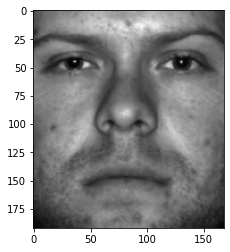

(168, 192)
246 9
[[80 80 84 ... 63 67 71]
 [81 79 78 ... 60 61 64]
 [80 79 82 ... 61 59 62]
 ...
 [12 12 19 ... 21 18 14]
 [12 12 15 ... 14 14 14]
 [12 12 12 ... 12 12 11]] (192, 168)
[80 80 84 ... 12 12 11] (32256,)
True
[[80 80 84 ... 12 12 11]
 [80 80 84 ... 12 12 11]
 [80 80 84 ... 12 12 11]]


In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 随便看看其中一张图像 分析一下数据：数据集 10个类 每个类65张图片
img = Image.open("/content/Datasets/CroppedYale/yaleB01/yaleB01_P00A+000E+00.pgm")    # 读取文件
plt.gray()
plt.imshow(img)
plt.show()
img.save('test.png')
print(img.size)   # 输出图片大小  168*192

d=np.array(img)
print(d.max(),d.min()) # 0~255

print(d,d.shape) # (192, 168)
d=d.ravel()
print(d,d.shape) # (32256,)

t=None
print(t == None)

c=d.copy()

t=np.vstack((d,c)) # 合并数组
t=np.vstack((t,c))
print(t)

### Dataset 1

In [ ]:
# 加载数据集1
import os
path = "/content/Datasets/CroppedYale" #文件夹目录
files= os.listdir(path) #得到文件夹下的所有文件名称
files.sort()
data,labels = None,None
for file in files: # 遍历文件夹
    if os.path.isdir(path+"/"+file) and file.find('yale')!=-1: #判断是否是数据集文件夹
        #print(file)
        imgs=os.listdir(path+"/"+file)
        for img_str in imgs:
            if img_str.find(".pgm")!=-1:
                img = Image.open(path+"/"+file+"/"+img_str)
                data=np.array(img).ravel() if data is None else np.vstack((data,np.array(img).ravel()))
                index=int(file[-1:])-1 if file[-2]=='0' else int(file[-2:])-1 #1-10转化为0-9
                labels=np.array(index) if labels is None else np.append(labels,index)
        #print(labels)
print(data.shape,labels.shape)

(650, 32256) (650,)


### Dataset 2



---


# 2. K-means Clustering

## 2.1 Dataset 1

### Train K-means clustering

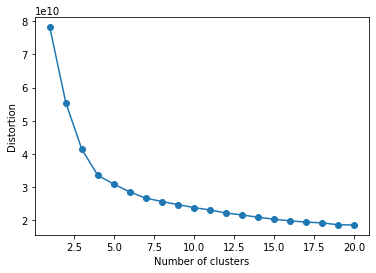

In [ ]:
from time import time
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Elbow Method
distortions = []
for i in range(1, 21):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=4, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(data)
    distortions.append(km.inertia_) # 样本到其最近的聚类中心的距离的平方之和

# plot
plt.plot(range(1, 21), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
def run_k_means(kmeans, name, data, labels):

    t_start = time()
    kmeans.fit(data)
    time_spent = time() - t_start
    results = [name, time_spent, kmeans.inertia_]

    clustering_metrics = [
        metrics.homogeneity_score, # 	homogeneity score 同质性
        metrics.completeness_score, # completeness score 完整性
        metrics.v_measure_score, #  V measure 两者的调和平均
        metrics.adjusted_rand_score, # adjusted Rand index 兰德调整性系数描述两个数据分布吻合程度 [-1,1] 
        metrics.adjusted_mutual_info_score, # adjusted mutual information 互信息 [-1,1]
    ]
    results += [m(labels, kmeans.labels_) for m in clustering_metrics]

    results += [
        metrics.silhouette_score(data, kmeans.labels_, # 轮廓系数：同类别越近，不同类别越远，分数越高 [-1,1]
                                 metric="euclidean", sample_size=300,)
    ]

    formatter_result = ("{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}"
                        "\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}")
    print(formatter_result.format(*results))

print(90 * '_')
print('init\t\ttime\tinertia\t\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

# kmeans1 = KMeans(init="k-means++", n_clusters=10, n_init=4,random_state=0, precompute_distances=True,max_iter=1000,tol=1e-10,verbose=1)
kmeans1 = KMeans(init="k-means++", n_clusters=10,n_init=1,random_state=0)
run_k_means(kmeans=kmeans1, name="k-means++", data=data, labels=labels)

kmeans2 = KMeans(init="random", n_clusters=10, n_init=1, random_state=0)
run_k_means(kmeans=kmeans2, name="random", data=data, labels=labels)

pca = PCA(n_components=10).fit(data)
kmeans3 = KMeans(init=pca.components_, n_clusters=10, n_init=1,random_state=0)
run_k_means(kmeans=kmeans3, name="PCA-based", data=data, labels=labels)
print(90 * '_')

__________________________________________________________________________________________
init		time	inertia		homo	compl	v-meas	ARI	AMI	silhouette
k-means++	1.826s	23935275726	0.121	0.125	0.123	0.045	0.097	0.185
random   	1.523s	24043609128	0.119	0.122	0.120	0.035	0.094	0.192
PCA-based	1.929s	24116183657	0.119	0.121	0.120	0.037	0.094	0.186
__________________________________________________________________________________________


### First evaluation

In [ ]:
# 评估策略上个单元格中已给出
import pandas as pd

d={} # d字典描述：key：真实label数值  value：该label类中所有图像预测的label值列表
for i in range(len(labels)):
    d[labels[i]]=[kmeans1.labels_[i]] if labels[i] not in d.keys() else d[labels[i]]+[kmeans1.labels_[i]]
keys=sorted(list(d.keys())) # 得到d keys列表的复制
nums,acc,pre=[],[],[]

for key in keys:
    # d[str(key)]字典描述：key：预测的label值 value：该值出现的次数
    # 当key为"num"表示总数量，为ratio表示正确比例 sort表示排序结果
    d[str(key)]={} 
    for t in d[key]:
        d[str(key)][t] = d[str(key)].get(t, 0) + 1
    s = sorted(d[str(key)].items(), key=lambda x: x[1], reverse=True)
    d[str(key)]['sort']=s
    d[str(key)]['ratio']=s[0][1]/len(d[key])
    d[str(key)]['num']=len(d[key])

    nums+=[d[str(key)]['num']]
    acc+=[d[str(key)]['ratio']]
    pre+=[d[str(key)]['sort']]

    print(key,":",s)
    print(d[str(key)])

sub = pd.DataFrame(columns=['Labels', 'Count','Accuracy','Predictions'])
sub['Labels'],sub['Count'],sub['Accuracy'],sub['Predictions'] = keys,nums,acc,pre
sub.to_csv('result-kmeans1.csv', index=None)

print(kmeans1.labels_)
print(len(labels))

0 : [(6, 15), (1, 8), (5, 8), (4, 7), (8, 7), (2, 7), (9, 7), (7, 3), (0, 3)]
{6: 15, 1: 8, 4: 7, 5: 8, 8: 7, 7: 3, 2: 7, 9: 7, 0: 3, 'sort': [(6, 15), (1, 8), (5, 8), (4, 7), (8, 7), (2, 7), (9, 7), (7, 3), (0, 3)], 'ratio': 0.23076923076923078, 'num': 65}
1 : [(3, 20), (5, 12), (9, 7), (8, 6), (4, 6), (2, 6), (1, 4), (0, 2), (7, 2)]
{3: 20, 8: 6, 5: 12, 4: 6, 9: 7, 0: 2, 1: 4, 7: 2, 2: 6, 'sort': [(3, 20), (5, 12), (9, 7), (8, 6), (4, 6), (2, 6), (1, 4), (0, 2), (7, 2)], 'ratio': 0.3076923076923077, 'num': 65}
2 : [(6, 18), (5, 10), (2, 8), (9, 7), (8, 7), (1, 5), (4, 4), (7, 3), (0, 3)]
{4: 4, 9: 7, 8: 7, 5: 10, 2: 8, 6: 18, 1: 5, 7: 3, 0: 3, 'sort': [(6, 18), (5, 10), (2, 8), (9, 7), (8, 7), (1, 5), (4, 4), (7, 3), (0, 3)], 'ratio': 0.27692307692307694, 'num': 65}
3 : [(1, 21), (2, 11), (4, 10), (5, 8), (9, 5), (8, 4), (0, 3), (7, 3)]
{4: 10, 1: 21, 0: 3, 7: 3, 2: 11, 5: 8, 8: 4, 9: 5, 'sort': [(1, 21), (2, 11), (4, 10), (5, 8), (9, 5), (8, 4), (0, 3), (7, 3)], 'ratio': 0.323076923

### Second evaluation

## 2.2 Dataset 2

### Train K-means clustering

### First evaluation

### Second evaluation 



---


# 3. Hierachical Clustering

## 3.1 Dataset 1

### Train Hierarchical clustering 

### First evaluation 

### Second evaluation 

## 3.2 Dataset 2

### Train Hierarchical clustering 

### First evaluation

### Second evalaution 



---


# 4. DBSCAN Clustering

## 4.1 Dataset 1

### Train DBSCAN clustering 

### First evaluation

### Second evaluation 

## 4.2 Dataset 2

### Train DBSCAN clustering 

### First evaluation 

### Second evaluation 